In [1]:
from preprocessing.preprocessing_2 import *
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from text_augmentation.data_augmentation import *

/Users/nguyendat/miniconda3/envs/base_2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("augmented_data.csv")

In [3]:
df[df['content'].apply(len) == 1]

,content,title
97152,👍,Hài lòng


In [4]:
df = df[df['content'].str.strip().apply(len) > 1]

In [5]:
df.shape

(106191, 2)

In [6]:
df = df.drop_duplicates(keep='first')
df.shape

(94849, 2)

In [7]:
df["cleaned"] = df['content'].apply(lambda x: clean_text(x, remove_emoji=True))

In [8]:
df['length'] = df['cleaned'].apply(lambda x: len(x.split()))
df[df['length'] >= 100].shape

(49, 4)

In [9]:
# df = df[df['length'] < 100]

In [10]:
df[df['cleaned'].apply(len) == 1]

,content,title,cleaned,length


In [11]:
df[df['cleaned'].apply(len) == 0]

,content,title,cleaned,length
1678,ha ha,Cực kì hài lòng,,0
3574,fast,Cực kì hài lòng,,0
5798,qetulnbfwsdg,Cực kì hài lòng,,0
7326,hub,Cực kì hài lòng,,0
8046,TDF,Hài lòng,,0
...,...,...,...,...
100202,B NH,Không hài lòng,,0
102763,KJDKSJFKDJ,Bình thường,,0
102984,tmots,Cực kì hài lòng,,0
102996,hejdfndj,Cực kì hài lòng,,0


In [12]:
df = df[df["cleaned"].apply(len) > 1]

In [13]:
df.shape

(94787, 4)

In [14]:
df

,content,title,cleaned,length
0,Các sản phẩm lỗi mà quá trình trả lại rất khó ...,Rất không hài lòng,các sản phẩm lỗi mà quá trình trả lại rất khó ...,37
1,Các sản phẩm lỗi mà quá trình trả lại rất khó ...,Rất không hài lòng,các sản phẩm lỗi mà quá trình trả lại rất khó ...,40
2,hầu hết mọi thứ được chỉ là khi mở hàng tôi th...,Cực kì hài lòng,hầu hết mọi thứ được chỉ là khi mở hàng tôi th...,43
3,ồ màn hình đẹp chân đế chắc chắn không có gì đ...,Cực kì hài lòng,ồ màn hình đẹp chân đế chắc chắn không có gì đ...,22
4,mọi thứ điều được nhưng do bên nhận vận chuyển...,Cực kì hài lòng,mọi thứ điều được nhưng do bên nhận vận chuyển...,18
...,...,...,...,...
106185,Trái ngược với công ty quảng cáo,Không hài lòng,trái ngược với công quảng cáo,6
106187,Sản phẩm được sử dụng sau nhiều tuần chỉ bị hỏ...,Rất không hài lòng,sản phẩm được sử dụng sau nhiều tuần chỉ bị hỏ...,13
106188,Các sản phẩm được sử dụng sau nhiều tuần đã bị...,Rất không hài lòng,các sản phẩm được sử dụng sau nhiều tuần đã bị...,14
106189,Tiếng vang không ổn định,Rất không hài lòng,tiếng vang không ổn định,5


In [15]:
df['title'].value_counts()

title
Cực kì hài lòng       48506
Rất không hài lòng    13427
Bình thường           12256
Không hài lòng        11161
Hài lòng               9437
Name: count, dtype: int64

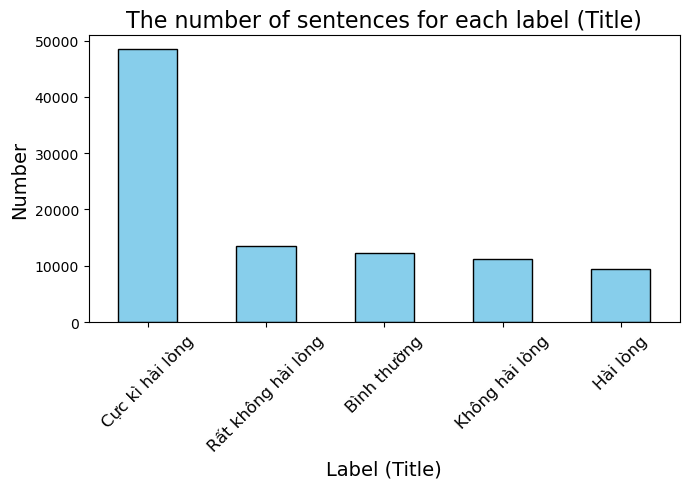

In [16]:
tag_counts = df['title'].value_counts()
plt.figure(figsize=(7, 5))
tag_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('The number of sentences for each label (Title)', fontsize=16)
plt.xlabel('Label (Title)', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

cleaned
1       337
2      1327
3      2351
4      3308
5      4153
       ... 
109       2
118       1
133       1
139       1
221       1
Name: count, Length: 113, dtype: int64


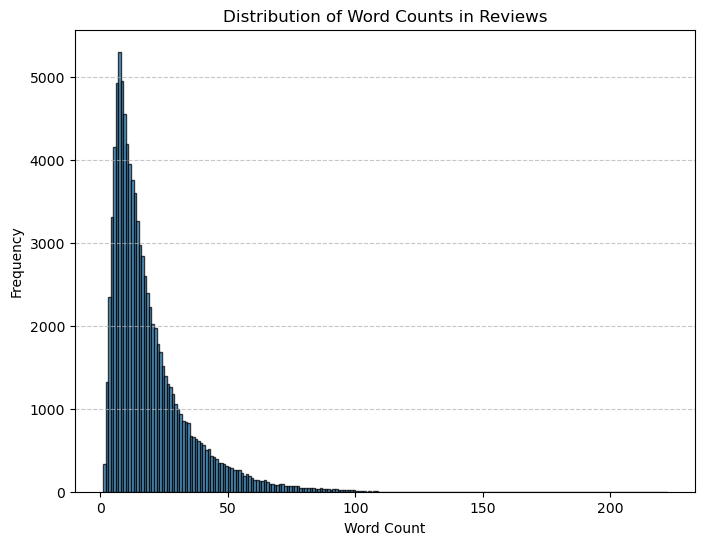

In [17]:
# Calculate the number of words in each review
word_counts = df['cleaned'].apply(lambda x: len(x.split()))

# Distribution of word counts
word_count_distribution = word_counts.value_counts().sort_index()

# Display the distribution
print(word_count_distribution)

plt.figure(figsize=(8, 6))
plt.hist(word_counts, bins=range(1, max(word_counts) + 2), edgecolor='black', alpha=0.75)
plt.title("Distribution of Word Counts in Reviews")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
df['title'].value_counts().reset_index()

,title,count
0,Cực kì hài lòng,48506
1,Rất không hài lòng,13427
2,Bình thường,12256
3,Không hài lòng,11161
4,Hài lòng,9437


In [19]:
def calculate_sentence_length_coverage(df, column_name, coverage=0.90):
    """
    Calculates the sentence length that covers a specified cumulative distribution of data.

    Parameters:
        df (pd.DataFrame): The input dataframe containing the data.
        column_name (str): The column containing word count data.
        coverage (float): The cumulative coverage (default is 0.90 for 90%).

    Returns:
        int: The maximum sentence length that covers up to the specified coverage.
    """
    
    word_count_distribution = word_counts.value_counts().sort_index()

    total_sentences = df['cleaned'].shape[0]

    cumulative_distribution = word_count_distribution.cumsum() / total_sentences
    
    sentence_length = cumulative_distribution[cumulative_distribution >= coverage].index[0]

    return sentence_length

In [20]:
def remove_diacritics_and_punctuation(text):
    # Loại bỏ dấu thanh (diacritics)
    text_no_diacritics = ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )
    # Loại bỏ dấu câu
    text_no_punctuation = re.sub(r'[^\w\s]', '', text_no_diacritics)
    return text_no_punctuation


In [21]:
df['removed_marks'] = df['cleaned'].apply(remove_diacritics_and_punctuation)

In [22]:
maxlen = calculate_sentence_length_coverage(df, 'word_count', 0.95)

In [23]:
maxlen

50

In [24]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tokenizers import Tokenizer
from transformers import BertTokenizer, AutoTokenizer
from tokenizers.models import WordPiece
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import WordPieceTrainer
import os
from pyvi import ViTokenizer

In [25]:
from transformers import get_linear_schedule_with_warmup
from transformers import AdamW
from build_model.lstm import LSTM

from torch.utils.tensorboard import SummaryWriter
from trainer.trainer import *
import shutil, pickle
from gensim.utils import simple_preprocess

In [26]:
# class CreatorTokenizer:
#     def __init__(self, sentences, tokenizer_path="tokenizer.json", vocab_size=8000, max_length=maxlen):
#         """
#         Args:
#             sentences (list of str): Danh sách các câu để huấn luyện tokenizer.
#             tokenizer_path (str): Đường dẫn lưu tokenizer.
#             vocab_size (int): Kích thước từ vựng tối đa.
#             max_length (int): Độ dài tối đa của các chuỗi đầu ra (dùng cho padding và truncation).
#         """
#         self.sentences = sentences
#         self.tokenizer_path = tokenizer_path
#         self.vocab_size = vocab_size
#         self.max_length = max_length

#         # Tạo file corpus tạm thời
#         self.corpus_file = "corpus.txt"
#         self._create_corpus_file()

#     def _create_corpus_file(self):
#         """Ghi các câu vào file corpus.txt để dùng cho việc huấn luyện tokenizer."""
#         with open(self.corpus_file, "w", encoding="utf-8") as f:
#             for sentence in self.sentences:
#                 f.write(sentence + "\n")

#     def create_tokenizer(self):
#         """Tạo tokenizer và lưu vào file JSON."""
#         tokenizer = Tokenizer(WordPiece(unk_token="[UNK]"))
#         tokenizer.pre_tokenizer = Whitespace()
#         trainer = WordPieceTrainer(
#             vocab_size=self.vocab_size,
#             special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"]
#         )
#         files = [self.corpus_file]
#         tokenizer.train(files, trainer)
#         tokenizer.save(self.tokenizer_path)
#         os.remove(self.corpus_file)
#         print(f"Tokenizer saved to {self.tokenizer_path}")

#     def load_tokenizer(self):
#         """Tải tokenizer từ file JSON."""
#         if not os.path.exists(self.tokenizer_path):
#             raise FileNotFoundError(f"{self.tokenizer_path} not found. Please create the tokenizer first.")
#         return Tokenizer.from_file(self.tokenizer_path)

#     def encode_sentences(self, sentences):
#         """
#         Token hóa và xử lý padding/truncation các câu đầu vào.

#         Args:
#             sentences (list of str): Danh sách các câu cần token hóa.

#         Returns:
#             np.ndarray: Chuỗi các `input_ids` sau khi padding/truncation.
#         """
#         tokenizer = self.load_tokenizer()

#         encoded_sentences = []
#         for sentence in sentences:
#             encoding = tokenizer.encode(sentence)
#             input_ids = encoding.ids

#             if len(input_ids) > self.max_length:
#                 input_ids = input_ids[:self.max_length]
#             else:
#                 input_ids = input_ids + [0] * (self.max_length - len(input_ids))

#             encoded_sentences.append(input_ids)

#         return np.array(encoded_sentences)

In [27]:
# creator = CreatorTokenizer(df['cleaned'])
# creator.create_tokenizer()

In [28]:
# tokenizer = Tokenizer.from_file("tokenizer.json")

In [29]:
# tokenizer.get_vocab_size()

In [30]:
# tokenizer_bert = BertTokenizer.from_pretrained('viet_bert_tokenizer', do_lower_case = False)

In [31]:
tokenizer_phobert = AutoTokenizer.from_pretrained('vinai/phobert-base', use_fast = False)

In [32]:
class CommentDataset(Dataset):
    def __init__(self, df, tokenizer, is_train=True, max_len=maxlen, transform=None):
        self.df = df
        self.max_len = max_len
        self.tokenizer = tokenizer
        self.categories = ['Rất không hài lòng', 'Không hài lòng', 'Bình thường', 'Hài lòng', 'Cực kì hài lòng']
        self.transform = transform
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        text, label = self.get_input_data(row)

        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_attention_mask=True,
            return_token_type_ids=False,
            return_tensors='pt'
        )
        
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_masks': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(label, dtype=torch.long),
        }

    def labelencoder(self,text):
        if text=='Rất không hài lòng':
            return 0
        elif text=='Không hài lòng':
            return 1
        elif text=='Bình thường':
            return 2
        elif text=='Hài lòng':
            return 3
        else:
            return 4

    def get_input_data(self, row):
        text = row['cleaned']
        if self.transform:
            text = self.transform(text)
        text = ' '.join(simple_preprocess(text))
        text = ' '.join(tokenizer_phobert.tokenize(text))
        label = self.labelencoder(row['title'])

        return text, label

In [33]:
train_df, valid_df = train_test_split(df[['cleaned', 'title']], test_size=0.2, random_state=42, stratify=df['title'])

## Augmentation

In [34]:
transform = compose(
    lambda text, n=10, p=0.5, max_attempts=10: synonym_replacement(text, n=n, p=p, max_attempts=max_attempts)
)

In [75]:
train_data = CommentDataset(train_df, tokenizer_phobert, transform=transform)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

valid_data = CommentDataset(valid_df, tokenizer_phobert)
valid_dataloader = DataLoader(valid_data, batch_size=32)

In [89]:
train_data[0]

{'text': 'tôi yêu cầu tẩy chay do sự độc ác trong dịch vụ sau bán hàng với khách hàng thạo đờ@@ ig nghĩ rằng khách hàng đã mua xong',
 'input_ids': tensor([    0,    70,   413,   630,  6013,  8611,    91,    61,  1964,  4561,
            12,  1626,   178,    53,   170,   119,    15,   336,   119, 14736,
         56417, 10573, 10013, 35166,   487,    87,   336,   119,    14,   188,
           954,     2,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1]),
 'attention_masks': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 'targets': tensor(0)}

In [76]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [77]:

# # Số lượng mẫu trong mỗi lớp
# class_counts = {
#     "Rất không hài lòng": 7999,
#     "Không hài lòng": 2981,
#     "Bình thường": 5320,
#     "Hài lòng": 12127,
#     "Cực kì hài lòng": 66750
# }

# # Tổng số mẫu
# total_samples = sum(class_counts.values())

# # Tính trọng số cho mỗi lớp theo tỷ lệ nghịch với số lượng lớp
# weights = [total_samples / count for count in class_counts.values()]

# # Chuyển weights thành tensor và chuyển sang device
# weights_tensor = torch.tensor(weights).float().to(device)

In [78]:
weights = [0] * 5
weights_df = train_df['title'].value_counts().reset_index()

weights[4] = int(weights_df[weights_df['title'] == 'Cực kì hài lòng']['count'].iloc[0])
weights[3] = int(weights_df[weights_df['title'] == 'Hài lòng']['count'].iloc[0])
weights[2] = int(weights_df[weights_df['title'] == 'Bình thường']['count'].iloc[0])
weights[1] = int(weights_df[weights_df['title'] == 'Không hài lòng']['count'].iloc[0])
weights[0] = int(weights_df[weights_df['title'] == 'Rất không hài lòng']['count'].iloc[0])

In [79]:
weights

[10741, 8929, 9805, 7550, 38804]

In [80]:
# class_counts = torch.tensor(weights, dtype=torch.float)

# # Tính trọng số ngược
# class_weights = 1.0 / class_counts
# normalized_weights = (class_weights / class_weights.sum()).to(device)

In [81]:
# Tính toán trọng số cho từng lớp (ngược lại với số lượng mẫu)
total_samples = sum(weights)
class_weights = [total_samples / weight for weight in weights]

# Chuyển trọng số thành tensor để sử dụng trong CrossEntropyLoss
normalized_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

In [82]:
normalized_weights

tensor([ 7.0598,  8.4924,  7.7337, 10.0436,  1.9542], device='mps:0')

In [83]:
from transformers import AdamW
from torch.optim import Adam
from tqdm import tqdm
from torchvision.ops import focal_loss

## LSTM

In [84]:
from build_model.lstm import *
from trainer.trainer import *

In [85]:
# import torch
# import torch.nn as nn

# class LSTM(nn.Module):
# 	def __init__(self, vocab_size, embedding_dim, lstm_units=64, num_layers=2, dropout=0.2, activation=None, batch_normalization=False, bidirectional=False, output_dim=5):
# 		super(LSTM, self).__init__()
# 		self.embedding=nn.Embedding(vocab_size, embedding_dim)
# 		self.lstm=nn.LSTM(embedding_dim, lstm_units, num_layers, batch_first=True, dropout=dropout, bidirectional=bidirectional)
# 		if bidirectional:
# 			self.dense1=nn.Linear(lstm_units*2, lstm_units)
# 		else:
# 			self.dense1=nn.Linear(lstm_units, lstm_units)
# 		self.bn=nn.BatchNorm1d(lstm_units) if batch_normalization else nn.Identity()
# 		self.activation=activation
# 		self.dropout=nn.Dropout(dropout)
# 		self.dense2=nn.Linear(lstm_units, output_dim)
# 	def forward(self, inputs):
# 		X=self.embedding(inputs)
# 		X,_=self.lstm(X)
# 		# X=self.dense1(X)
# 		X_mean = torch.mean(X, dim=1)
# 		# X = X[:, -1, :]
# 		X = self.dense1(X_mean)
# 		X=self.bn(X)
# 		if self.activation is not None:
# 			X=self.activation(X)
# 		X=self.dropout(X)
# 		X=self.dense2(X)
# 		return X

In [104]:
import torch
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, lstm_units=64, num_layers=2, dropout=0.2, activation=None, batch_normalization=False, bidirectional=False, output_dim=5):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, lstm_units, num_layers, batch_first=True, dropout=dropout, bidirectional=bidirectional)
        
        # Adjust hidden size depending on bidirectional flag
        hidden_size = lstm_units * 2 if bidirectional else lstm_units
        self.dense1 = nn.Linear(hidden_size * 2, lstm_units)  # After concatenating mean and max, double the hidden size
        
        # Batch normalization if specified
        self.bn = nn.BatchNorm1d(lstm_units) if batch_normalization else nn.Identity()
        
        # Activation function if specified
        self.activation = activation
        
        self.dropout = nn.Dropout(dropout)
        
        # Output layer size based on concatenation of mean and max
        self.dense2 = nn.Linear(lstm_units, output_dim)  # Fixing input size based on dense1 output

    def forward(self, inputs):
        X = self.embedding(inputs)
        X, _ = self.lstm(X)
        
        # Calculate mean and max along the sequence length dimension
        X_mean = torch.mean(X, dim=1)
        X_max = torch.max(X, dim=1).values
        
        # Concatenate mean and max representations
        X = torch.cat([X_mean, X_max], dim=1)

        X = self.dense1(X)
        X = self.bn(X)
        if self.activation is not None:
            X = self.activation(X)
        X = self.dropout(X)
        X = self.dense2(X)
        return X


In [107]:
from trainer.trainer import *
lstm_units = 128 # 512 > 83% f1 and dropout = 0.3 (0.830764880531599, 0.8355025358806822, 0.830764880531599, 0.8328585860260769)
output_dim = 5

model = LSTM(
    vocab_size=64001,
    embedding_dim=768,
    lstm_units=lstm_units,
    num_layers=2,            
    dropout=0.5,             
    activation=nn.ReLU(),
    batch_normalization=True,  
    bidirectional=False,     
    output_dim=5           
).to(device)

# Định nghĩa hàm mất mát và tối ưu hóa
criterion =  nn.CrossEntropyLoss(weight=normalized_weights, label_smoothing=0.05)
optimizer = AdamW(model.parameters(), lr=1e-3, eps = 1e-8, weight_decay=1e-3)

epochs = 20
max_grad_norm = 1.0
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

grad_clip = True

_trainer = trainer()

if os.path.exists('logs/LSTM'):
    shutil.rmtree('logs/LSTM')
writer = SummaryWriter(log_dir='logs/LSTM')

/Users/nguyendat/miniconda3/envs/base_2/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [108]:
best_f1 = 0
best_loss = float('inf')
for epoch in range(epochs):
    _trainer.train(
        model,
        train_dataloader,
        epoch,
        epochs,
        writer,
        criterion,
        optimizer,
        device,
        max_grad_norm,
        scheduler,
        grad_clip=grad_clip
    )

    val_loss, val_f1 = _trainer.validation(
        model,
        valid_dataloader,
        criterion,
        device
    )

    print(f"TEST | Epoch: {epoch+1}/{epochs} | Loss: {val_loss:.4f} | F1: {val_f1:.4f}")
    writer.add_scalar('Val/Loss', val_loss, epoch+1)
    writer.add_scalar('Val/f1', val_f1, epoch+1)

    checkpoint = {
        'model_state_dict': model.state_dict(),
        'epoch': epoch+1,
        'optimizer_state_dict': optimizer.state_dict()
    }
    
    os.makedirs('model_state_dict/LSTM', exist_ok=True)
    torch.save(checkpoint, os.path.join('model_state_dict/LSTM', 'last.pth'))
    if val_f1 > best_f1 and val_loss < best_loss:
        torch.save(checkpoint, os.path.join('model_state_dict/LSTM', 'best.pth'))
        best_loss = val_loss
        best_f1 = val_f1

TRAIN | Epoch: 1/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0400: 100%|█████████| 2370/2370 [01:10<00:00, 33.65it/s]


TEST | Epoch: 1/20 | Loss: 1.1620 | F1: 0.6815


TRAIN | Epoch: 2/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0366: 100%|█████████| 2370/2370 [01:10<00:00, 33.81it/s]


TEST | Epoch: 2/20 | Loss: 1.1269 | F1: 0.7190


TRAIN | Epoch: 3/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0344: 100%|█████████| 2370/2370 [01:10<00:00, 33.80it/s]


TEST | Epoch: 3/20 | Loss: 1.1051 | F1: 0.7258


TRAIN | Epoch: 4/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0321: 100%|█████████| 2370/2370 [01:10<00:00, 33.79it/s]


TEST | Epoch: 4/20 | Loss: 1.0774 | F1: 0.7409


TRAIN | Epoch: 5/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0300: 100%|█████████| 2370/2370 [01:10<00:00, 33.79it/s]


TEST | Epoch: 5/20 | Loss: 1.0747 | F1: 0.7484


TRAIN | Epoch: 6/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0282: 100%|█████████| 2370/2370 [01:10<00:00, 33.79it/s]


TEST | Epoch: 6/20 | Loss: 1.0667 | F1: 0.7566


TRAIN | Epoch: 7/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0266: 100%|█████████| 2370/2370 [01:10<00:00, 33.72it/s]


TEST | Epoch: 7/20 | Loss: 1.0707 | F1: 0.7631


TRAIN | Epoch: 8/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0252: 100%|█████████| 2370/2370 [01:10<00:00, 33.71it/s]


TEST | Epoch: 8/20 | Loss: 1.0531 | F1: 0.7655


TRAIN | Epoch: 9/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0239: 100%|█████████| 2370/2370 [01:10<00:00, 33.73it/s]


TEST | Epoch: 9/20 | Loss: 1.0765 | F1: 0.7709


TRAIN | Epoch: 10/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0228: 100%|████████| 2370/2370 [01:10<00:00, 33.69it/s]


TEST | Epoch: 10/20 | Loss: 1.0605 | F1: 0.7740


TRAIN | Epoch: 11/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0217: 100%|████████| 2370/2370 [01:10<00:00, 33.65it/s]


TEST | Epoch: 11/20 | Loss: 1.0861 | F1: 0.7785


TRAIN | Epoch: 12/20 | Iter: 2370/2370 | Error: 0/2370 | Loss: 0.0208: 100%|████████| 2370/2370 [01:10<00:00, 33.78it/s]


TEST | Epoch: 12/20 | Loss: 1.0889 | F1: 0.7793


TRAIN | Epoch: 13/20 | Iter: 1568/2370 | Error: 0/2370 | Loss: 0.0196:  66%|█████▎  | 1568/2370 [00:46<00:23, 33.75it/s]


KeyboardInterrupt: 

In [48]:
checkpoint = torch.load("model_state_dict/LSTM/best.pth")

/var/folders/kz/74mz5c7s0bj57yfdc183qm480000gn/T/ipykernel_10774/501570415.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("model_state_dict/LSTM

In [49]:
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [52]:
metrics, metrics_macro = _trainer.evaluate_model(model, valid_dataloader, None, device)

In [53]:
metrics['Accuracy'], metrics['precision'], metrics['recall'], metrics['f1']

(0.8343465761817239, 0.8384922753117587, 0.8343465761817239, 0.836196878988619)

In [54]:
metrics_macro['Accuracy'], metrics_macro['precision'], metrics_macro['recall'], metrics_macro['f1']

(0.8343465761817239,
 0.7571233858111648,
 0.7674074200326348,
 0.7620274184520014)

## RNN

In [78]:
from build_model.rnn import *

In [81]:
output_dim = 5

RNN_model = RNN(vocab_size=64001, embedding_dim=768, output_dim=output_dim, rnn_units=512, dropout=0.3, batch_normalization=True, bidirectional=False).to(device)

# Định nghĩa hàm mất mát và tối ưu hóa
criterion = nn.CrossEntropyLoss(weight=normalized_weights, label_smoothing=0.05)  # Hàm mất mát cho phân loại đa lớp
optimizer = AdamW(RNN_model.parameters(), lr=1e-3, eps = 1e-8)

epochs = 20
max_grad_norm = 1.0
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)


if os.path.exists('logs/RNN_dup'):
    shutil.rmtree('logs/RNN_dup')
writer = SummaryWriter(log_dir='logs/RNN_dup')


/Users/nguyendat/miniconda3/envs/base_2/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [82]:
_trainer = trainer()
best_f1 = 0
for epoch in range(epochs):
    _trainer.train(
        RNN_model,
        train_dataloader,
        epoch,
        epochs,
        writer,
        criterion,
        optimizer,
        device,
        max_grad_norm,
        scheduler,
        grad_clip=True
    )

    val_loss, val_f1 = _trainer.validation(
        RNN_model,
        valid_dataloader,
        criterion,
        device
    )
    print(f"TEST | Epoch: {epoch+1}/{epochs} | Loss: {val_loss:.4f} | F1: {val_f1:.4f}")
    writer.add_scalar('Val/Loss', val_loss, epoch+1)
    writer.add_scalar('Val/F1', val_f1, epoch+1)
    checkpoint = {
        'model_state_dict': RNN_model.state_dict(),
        'epoch': epoch+1,
        'optimizer_state_dict': optimizer.state_dict()
    }
    os.makedirs('model_state_dict/RNN_dup', exist_ok=True)
    torch.save(checkpoint, os.path.join('model_state_dict/RNN_dup', 'last.pth'))
    if val_f1 > best_f1:
        torch.save(checkpoint, os.path.join('model_state_dict/RNN_dup', 'best.pth'))
        best_f1 = val_f1

TRAIN | Epoch: 1/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0538: 100%|█████████| 2653/2653 [01:53<00:00, 23.37it/s]


TEST | Epoch: 1/20 | Loss: 1.7851 | F1: 0.0553


TRAIN | Epoch: 2/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0531: 100%|█████████| 2653/2653 [01:52<00:00, 23.62it/s]


TEST | Epoch: 2/20 | Loss: 1.6747 | F1: 0.0552


TRAIN | Epoch: 3/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0526: 100%|█████████| 2653/2653 [01:53<00:00, 23.42it/s]


TEST | Epoch: 3/20 | Loss: 1.6775 | F1: 0.0759


TRAIN | Epoch: 4/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0523: 100%|█████████| 2653/2653 [01:53<00:00, 23.28it/s]


TEST | Epoch: 4/20 | Loss: 1.6764 | F1: 0.0410


TRAIN | Epoch: 5/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0520: 100%|█████████| 2653/2653 [01:54<00:00, 23.27it/s]


TEST | Epoch: 5/20 | Loss: 1.6402 | F1: 0.0330


TRAIN | Epoch: 6/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0518: 100%|█████████| 2653/2653 [01:53<00:00, 23.27it/s]


TEST | Epoch: 6/20 | Loss: 1.6425 | F1: 0.0348


TRAIN | Epoch: 7/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0516: 100%|█████████| 2653/2653 [01:54<00:00, 23.26it/s]


TEST | Epoch: 7/20 | Loss: 1.6394 | F1: 0.0317


TRAIN | Epoch: 8/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0515: 100%|█████████| 2653/2653 [01:54<00:00, 23.27it/s]


TEST | Epoch: 8/20 | Loss: 1.6442 | F1: 0.0535


TRAIN | Epoch: 9/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0513: 100%|█████████| 2653/2653 [01:54<00:00, 23.27it/s]


TEST | Epoch: 9/20 | Loss: 1.6464 | F1: 0.0289


TRAIN | Epoch: 10/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0513: 100%|████████| 2653/2653 [01:54<00:00, 23.15it/s]


TEST | Epoch: 10/20 | Loss: 1.6426 | F1: 0.0688


TRAIN | Epoch: 11/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0513: 100%|████████| 2653/2653 [01:54<00:00, 23.22it/s]


TEST | Epoch: 11/20 | Loss: 1.6383 | F1: 0.0317


TRAIN | Epoch: 12/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0512: 100%|████████| 2653/2653 [01:53<00:00, 23.29it/s]


TEST | Epoch: 12/20 | Loss: 1.6385 | F1: 0.0410


TRAIN | Epoch: 13/20 | Iter: 1151/2653 | Error: 0/2653 | Loss: 0.0512:  43%|███▍    | 1151/2653 [00:49<01:04, 23.27it/s]


KeyboardInterrupt: 

In [90]:
metrics = _trainer.evaluate_model(RNN_model, valid_dataloader, None, device)

/Users/nguyendat/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
metrics['Accuracy'], metrics['precision'], metrics['recall'], metrics['f1']

(0.06876444631225047,
 0.5326953207007578,
 0.06876444631225047,
 0.055350020289816476)

## GRU

In [87]:
from build_model.gru import *

In [88]:
gru_units = 512
num_layers = 2
dropout = 0.3
output_dim = 5

GRU_model = GRU(vocab_size=64001, 
                embedding_dim=768, 
                gru_units=gru_units, 
                num_layers=num_layers, 
                output_dim=output_dim, 
                dropout=dropout, 
                batch_normalization=True, 
                bidirectional=False).to(device)

# Định nghĩa hàm mất mát và tối ưu hóa
criterion = nn.CrossEntropyLoss(weight=normalized_weights, label_smoothing=0.05)  # Hàm mất mát cho phân loại đa lớp
optimizer = AdamW(GRU_model.parameters(), lr=1e-3, eps = 1e-8)

epochs = 20
max_grad_norm = 1.0
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

grad_clip = True

if os.path.exists('logs/GRU'):
    shutil.rmtree('logs/GRU')
writer = SummaryWriter(log_dir='logs/GRU')


/Users/nguyendat/miniconda3/envs/base_2/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [58]:
from trainer.trainer import *
_trainer = trainer()
best_f1 = 0

for epoch in range(epochs):
    _trainer.train(
        GRU_model,
        train_dataloader,
        epoch,
        epochs,
        writer,
        criterion,
        optimizer,
        device,
        max_grad_norm,
        scheduler,
        grad_clip=grad_clip
    )

    val_loss, val_f1 = _trainer.validation(
        GRU_model,
        valid_dataloader,
        criterion,
        device
    )
    print(f"TEST | Epoch: {epoch+1}/{epochs} | Loss: {val_loss:.4f} | F1: {val_f1:.4f}")
    writer.add_scalar('Val/Loss', val_loss, epoch+1)
    writer.add_scalar('Val/F1', val_f1, epoch+1)
    checkpoint = {
        'model_state_dict': GRU_model.state_dict(),
        'epoch': epoch+1,
        'optimizer_state_dict': optimizer.state_dict()
    }
    os.makedirs('model_state_dict/GRU', exist_ok=True)
    torch.save(checkpoint, os.path.join('model_state_dict/GRU', 'last.pth'))
    if val_f1 > best_f1:
        torch.save(checkpoint, os.path.join('model_state_dict/GRU', 'best.pth'))
        best_f1 = val_f1

TRAIN | Epoch: 1/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0405: 100%|█████████| 2653/2653 [04:14<00:00, 10.41it/s]


TEST | Epoch: 1/20 | Loss: 1.1826 | F1: 0.6642


TRAIN | Epoch: 2/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0367: 100%|█████████| 2653/2653 [04:14<00:00, 10.42it/s]


TEST | Epoch: 2/20 | Loss: 1.1245 | F1: 0.6966


TRAIN | Epoch: 3/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0343: 100%|█████████| 2653/2653 [04:15<00:00, 10.39it/s]


TEST | Epoch: 3/20 | Loss: 1.0915 | F1: 0.7123


TRAIN | Epoch: 4/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0320: 100%|█████████| 2653/2653 [04:13<00:00, 10.47it/s]


TEST | Epoch: 4/20 | Loss: 1.0443 | F1: 0.7524


TRAIN | Epoch: 5/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0300: 100%|█████████| 2653/2653 [04:16<00:00, 10.36it/s]


TEST | Epoch: 5/20 | Loss: 1.0067 | F1: 0.7681


TRAIN | Epoch: 6/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0286: 100%|█████████| 2653/2653 [04:16<00:00, 10.35it/s]


TEST | Epoch: 6/20 | Loss: 1.0091 | F1: 0.7631


TRAIN | Epoch: 7/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0274: 100%|█████████| 2653/2653 [04:13<00:00, 10.45it/s]


TEST | Epoch: 7/20 | Loss: 0.9958 | F1: 0.7791


TRAIN | Epoch: 8/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0264: 100%|█████████| 2653/2653 [04:14<00:00, 10.44it/s]


TEST | Epoch: 8/20 | Loss: 0.9673 | F1: 0.7756


TRAIN | Epoch: 9/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0254: 100%|█████████| 2653/2653 [04:15<00:00, 10.38it/s]


TEST | Epoch: 9/20 | Loss: 0.9648 | F1: 0.7925


TRAIN | Epoch: 10/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0245: 100%|████████| 2653/2653 [04:15<00:00, 10.38it/s]


TEST | Epoch: 10/20 | Loss: 0.9449 | F1: 0.8001


TRAIN | Epoch: 11/20 | Iter: 2653/2653 | Error: 0/2653 | Loss: 0.0238: 100%|████████| 2653/2653 [04:06<00:00, 10.75it/s]


TEST | Epoch: 11/20 | Loss: 0.9412 | F1: 0.8001


TRAIN | Epoch: 12/20 | Iter: 889/2653 | Error: 0/2653 | Loss: 0.0228:  34%|███▎      | 889/2653 [05:06<10:07,  2.90it/s]


KeyboardInterrupt: 

In [90]:
check_point_gru = torch.load('model_state_dict/GRU/gru_best.pth', map_location=device)

/var/folders/kz/74mz5c7s0bj57yfdc183qm480000gn/T/ipykernel_12579/2977029950.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point_gru = torch.load('model_state_dic

In [91]:
GRU_model.load_state_dict(check_point_gru['model_state_dict'])

<All keys matched successfully>

In [94]:
metrics, metrics_macro = _trainer.evaluate_model(GRU_model, valid_dataloader, None, device)

In [95]:
metrics['Accuracy'], metrics['precision'], metrics['recall'], metrics['f1']

(0.831141901126349, 0.8351840111668509, 0.831141901126349, 0.8329592617058731)

In [96]:
metrics_macro['Accuracy'], metrics_macro['precision'], metrics_macro['recall'], metrics_macro['f1']

(0.831141901126349, 0.752927932027668, 0.7634990726913011, 0.7580337225885566)

## PhoBert

In [55]:
from trainer.trainer_bert import *
from build_model.phobert import *

In [56]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

In [ ]:
phobert_model = BertClassifier(dropout=0.5).to(device)

# Định nghĩa hàm mất mát và tối ưu hóa
criterion =  nn.CrossEntropyLoss(weight=normalized_weights, label_smoothing=0.05)
optimizer = AdamW(phobert_model.parameters(), lr=3e-5, eps = 1e-8)

epochs = 50

max_grad_norm = 1.0
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

grad_clip = True

if os.path.exists('logs/phobert'):
    shutil.rmtree('logs/phobert')
writer = SummaryWriter(log_dir='logs/phobert')
_trainer = trainer()

/Users/nguyendat/miniconda3/envs/base_2/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [40]:
best_f1 = 0
for epoch in range(epochs):
    _trainer.train(
        phobert_model,
        train_dataloader,
        epoch,
        epochs,
        writer,
        criterion,
        optimizer,
        scheduler,
        device,
        max_grad_norm,
        grad_clip
    )
    val_loss, val_f1 = _trainer.validation(
        phobert_model,
        valid_dataloader, 
        criterion,
        device,
        epoch,
        epochs
    )
    print(f"TEST | Epoch: {epoch+1}/{epochs} | Loss: {val_loss:.4f} | F1: {val_f1:.4f}")
    writer.add_scalar('Val/Loss', val_loss, epoch+1)
    writer.add_scalar('Val/F1', val_f1, epoch+1)
    checkpoint = {
        'model_state_dict': phobert_model.state_dict(),
        'epoch': epoch+1,
        'optimizer_state_dict': optimizer.state_dict()
    }
    os.makedirs('model_state_dict/phobert', exist_ok=True)
    torch.save(checkpoint, os.path.join('model_state_dict/phobert', 'last.pth'))
    if val_f1 > best_f1:
        torch.save(checkpoint, os.path.join('model_state_dict/phobert', 'best.pth'))
        best_f1 = val_f1

TRAIN | Epoch: 1/10 | Loss: 0.0529: 100%|███████████████████████████████████████████| 2380/2380 [08:04<00:00,  4.91it/s]
VAL | Epoch: 1/10 | Loss: 0.0516: 100%|███████████████████████████████████████████████| 595/595 [00:34<00:00, 17.06it/s]


TEST | Epoch: 1/10 | Loss: 1.6519 | F1: 0.4421


TRAIN | Epoch: 2/10 | Loss: 0.0505:   2%|▉                                            | 47/2380 [00:09<08:06,  4.80it/s]


KeyboardInterrupt: 

In [59]:
check_point_phobert = torch.load('model_state_dict/PhoBert/phobert_best.pth', map_location=device)

/var/folders/kz/74mz5c7s0bj57yfdc183qm480000gn/T/ipykernel_10774/2892398841.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point_phobert = torch.load('model_state

In [60]:
phobert_model.load_state_dict(check_point_phobert['model_state_dict'])

<All keys matched successfully>

In [62]:
metrics, metrics_macro = _trainer.evaluate_model(phobert_model, valid_dataloader, None, device)
metrics['Accuracy'], metrics['precision'], metrics['recall'], metrics['f1']

(0.8858098873650974, 0.885049330733708, 0.8858098873650974, 0.8852346881055579)

In [ ]:
metrics_macro['Accuracy'], metrics_macro['precision'], metrics_macro['recall'], metrics_macro['f1']